In [36]:
import pandas as pd
import numpy as np
from sklearn import model_selection, linear_model, preprocessing, metrics, pipeline

%matplotlib inline

In [2]:
df = pd.read_csv("/data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df_dummy = pd.get_dummies(df, drop_first=True)
df_dummy.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [5]:
target = "charges"
X = df_dummy.copy()
del X[target]
y = df.charges

In [7]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3) 

In [8]:
X_train.shape

(936, 8)

In [9]:
X_test.shape

(402, 8)

In [10]:
936 / X.shape[0]

0.6995515695067265

In [11]:
X_train

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
530,57,42.130,1,1,1,0,1,0
19,30,35.300,0,1,1,0,0,1
1,18,33.770,1,1,0,0,1,0
173,35,34.800,1,0,0,0,0,1
443,59,36.520,1,0,0,0,1,0
92,59,29.830,3,1,1,0,0,0
1332,52,44.700,3,0,0,0,0,1
1196,19,30.020,0,0,1,1,0,0
889,57,33.630,1,1,0,1,0,0
787,21,36.860,0,1,0,1,0,0


In [13]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train) # finds out mean and std for each column

X_train_std = scaler.transform(X_train) #calculates the Z score.
X_test_std = scaler.transform(X_test)

In [14]:
scaler = preprocessing.StandardScaler()
X_train_std = scaler.fit_transform(X_train) # finds out mean and std for each column
X_test_std = scaler.transform(X_test)

In [15]:
lr = linear_model.LinearRegression()
lr.fit(X_train_std, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
y_train_pred = lr.predict(X_train_std)
y_test_pred = lr.predict(X_test_std)

In [17]:
pd.DataFrame({"actual": y_test, "predict": y_test_pred})

,actual,predict
1108,2904.08800,4266.296297
420,46889.26120,38545.532438
603,16085.12750,18202.511320
1133,9991.03765,7688.990445
159,19749.38338,10917.176650
102,21344.84670,2847.309846
1185,8603.82340,8485.822203
512,9361.32680,8587.560947
759,36307.79830,28113.790302
44,6079.67150,10576.846742


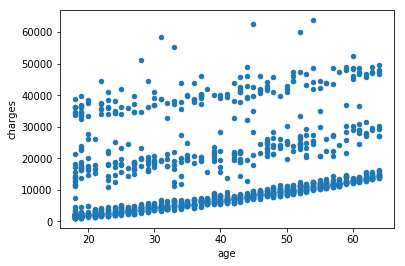

In [21]:
df.plot.scatter("age", "charges")

In [22]:
lr.coef_

array([3613.2642619 , 2018.25694017,  648.40838588, -114.06527451,
       9447.25604334,  -18.93270021, -452.62639555, -391.66168886])

In [24]:
pd.DataFrame({"feature": X.columns, "coef": lr.coef_})

,coef,feature
0,3613.264262,age
1,2018.256940,bmi
2,648.408386,children
3,-114.065275,sex_male
4,9447.256043,smoker_yes
5,-18.932700,region_northwest
6,-452.626396,region_southeast
7,-391.661689,region_southwest


In [25]:
lr.intercept_

13220.658562211538

In [32]:
mse_train = np.sum((y_train - y_train_pred) ** 2) / len(y_train)
mse_test = np.sum((y_test - y_test_pred) ** 2) / len(y_test)
mse_train, mse_test

(36156947.86114339, 37419486.22901544)

In [33]:
metrics.mean_squared_error(y_train, y_train_pred)

36156947.86114339

In [34]:
metrics.mean_squared_error(y_test, y_test_pred)

37419486.22901544

In [35]:
metrics.r2_score(y_test, y_test_pred)

0.7640243616327616

In [86]:
target = "charges"
X = df.copy()
del X[target]
y = np.log(df[target])
#y = df[target]
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                                test_size = 0.3, random_state = 134) 

pipe = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])

pipe.fit(X_train, y_train)

y_test_pred = pipe.predict(X_test)

metrics.mean_squared_error(y_test, y_test_pred), pipe.score(X_test, y_test)

(0.15371540658102048, 0.8220744317548274)